In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("winequality-white.csv",sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(4898, 12)

There are 11 independent variable and 1 dependent variable(quality)

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


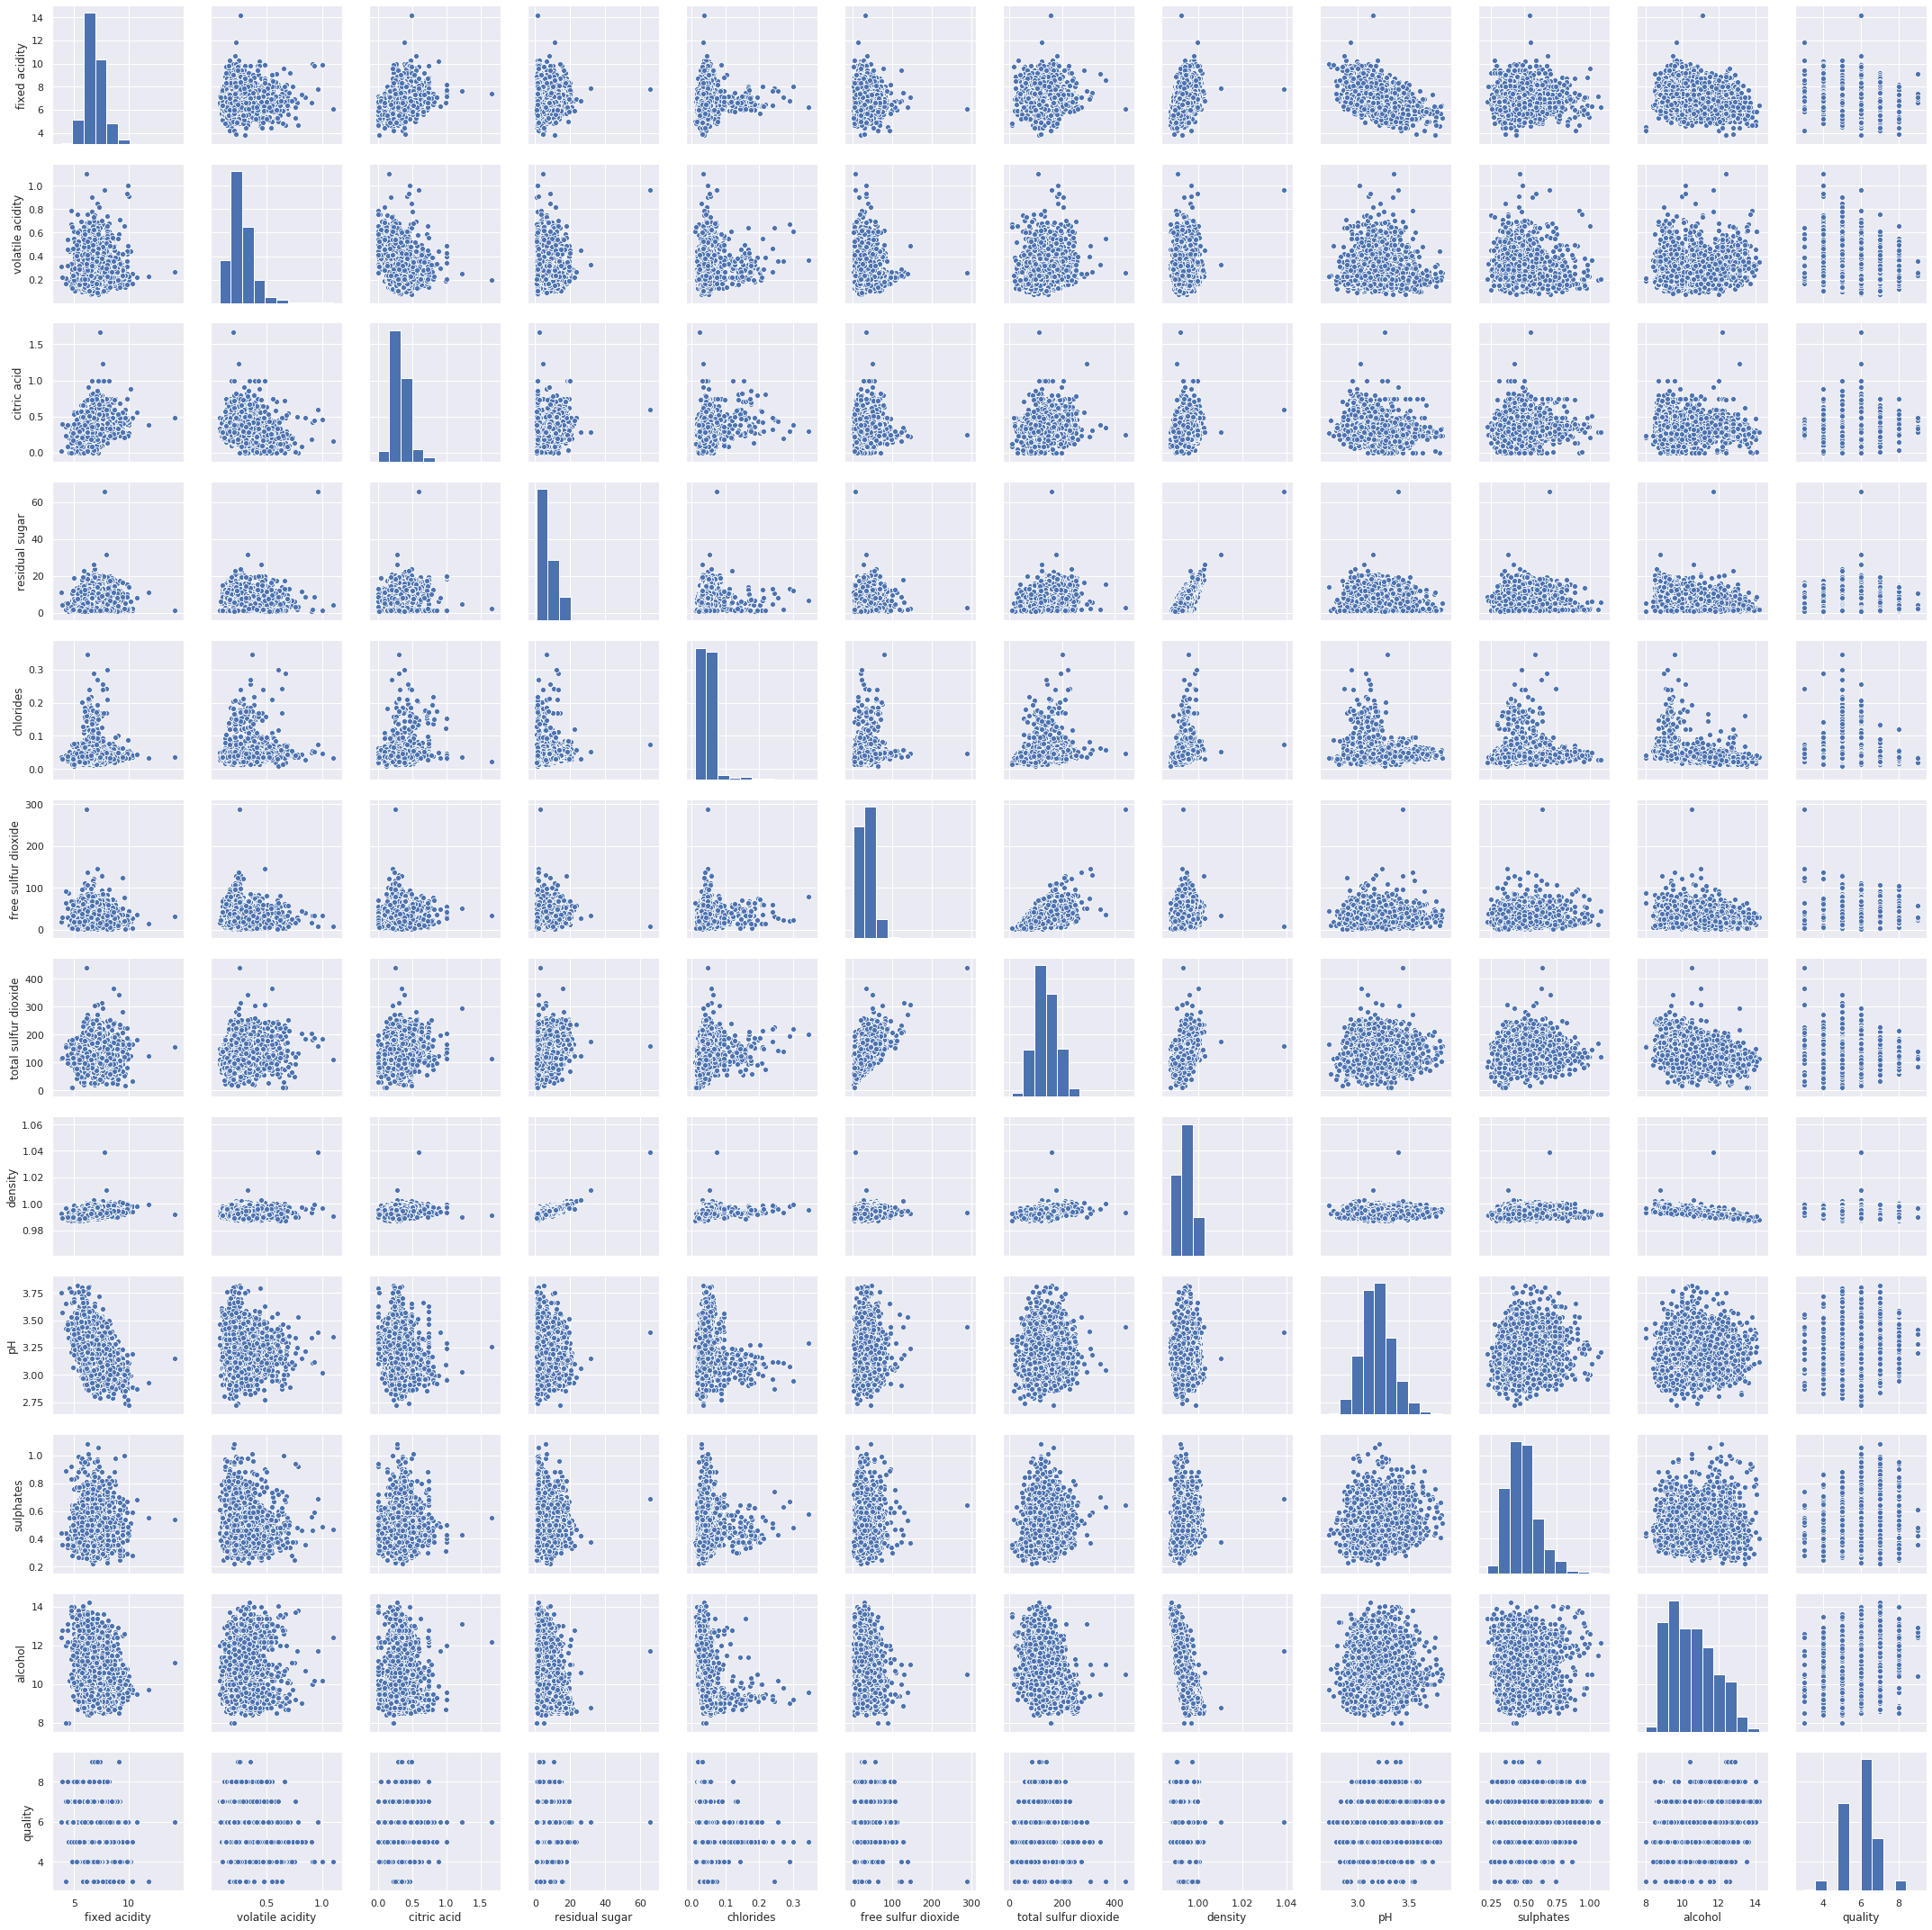

In [5]:
sns.pairplot(data)

Many independent variables are having extreme value outliers values and is right skewed

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


No missing values and all independent variables are float and one dependent variable(quality) is int

In [7]:
sorted(list(data.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]

Dependent variable(quality) has range 1-10 but has values from range 3-9

In [8]:
data.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

6,5 and 7 has most of the data

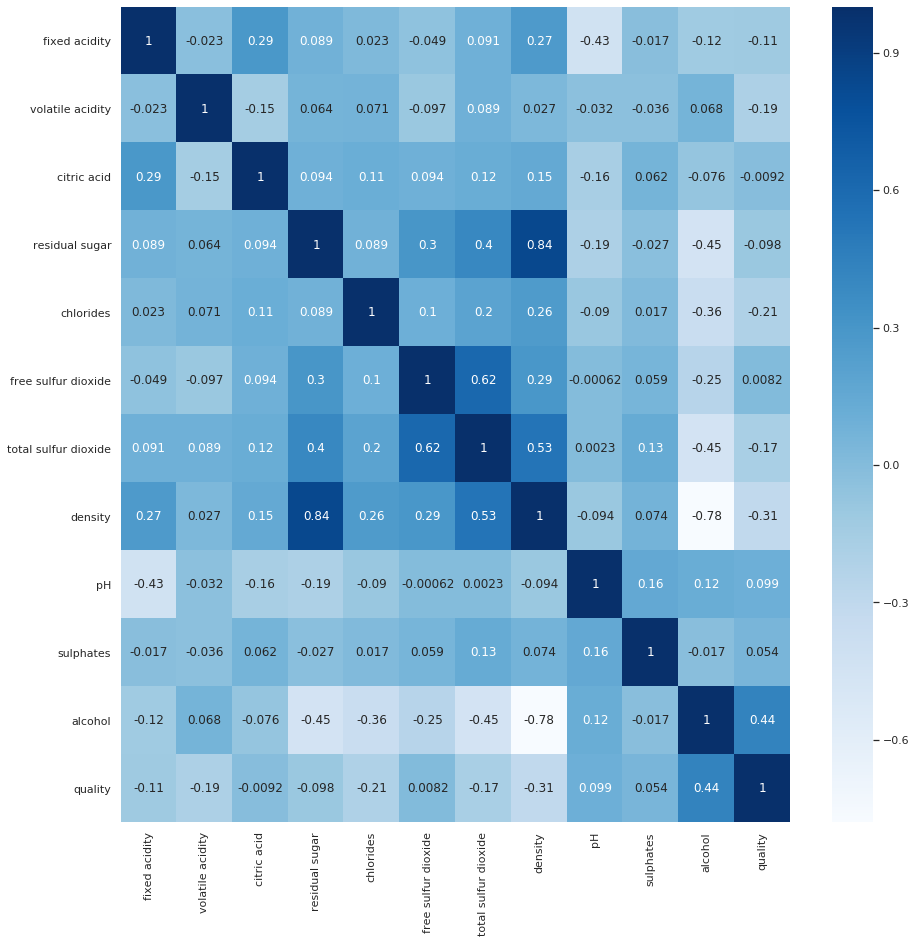

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),cmap="Blues",annot=True)

There is high correlation between density and residual sugar, if you do linear regression combine both into one variable.
Safe to drop citric acid and free surlphur dioxide in case of linear regression

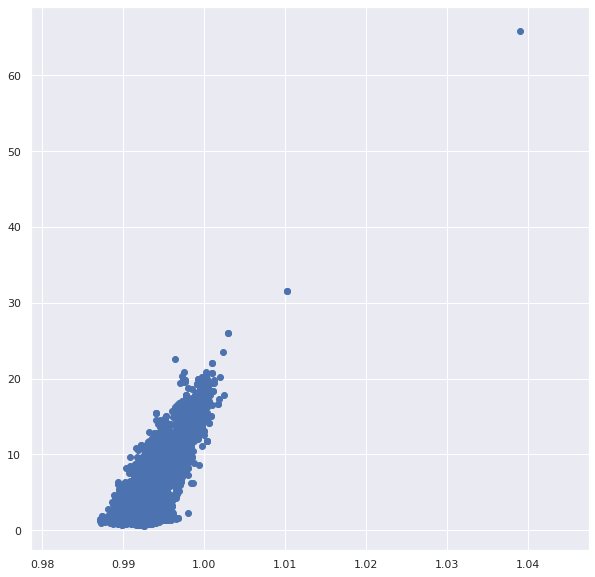

In [10]:
plt.figure(figsize=(10,10))
plt.scatter(x=data["density"],y=data["residual sugar"])

Its confirmed by graph since its kinda make straight line

In [11]:
data[["free sulfur dioxide"]].quantile([0,0.25,0.5,0.75,1],axis=0)

,free sulfur dioxide
0.00,2.0
0.25,23.0
0.50,34.0
0.75,46.0
1.00,289.0


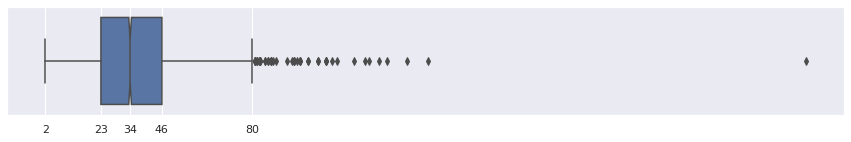

In [12]:
plt.figure(figsize=(15,2))
plt.xticks([int(max(2,23-1.5*(46-23))),23,34,46,int(min(289,46+1.5*(46-23)))])
sns.boxplot(data=data,x=["free sulfur dioxide"],notch=True,whis=1.5)

Any value outside whisker whould be considerd extreme value outlier

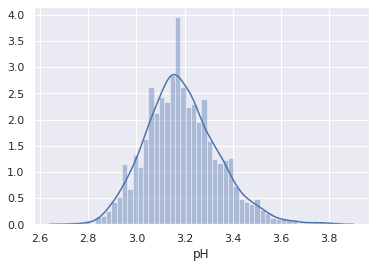

In [13]:
sns.distplot(data["pH"],kde=True)

It only looks like haiving normally distributed

In [14]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,4898
Total Missing (%),0.0%
Total size in memory,459.3 KiB
Average record size in memory,96.0 B
Numeric,12
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0
